<a href="https://colab.research.google.com/github/Knottyanalyst/The-Sparks-Foundation/blob/main/clustering%20analysis%20on%20iris%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSF - GRIP Data Science and Business Analytics Internship

# Intern - Srujan Marathe

## Task 2 - Finding the optimum number of clusters in iris data using Unsupervised ML.

## Importing necessary libraries.

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

from sklearn.cluster import KMeans # We use KMeans Clustering for our case.

import warnings
warnings.filterwarnings('ignore')

## Importing the data.

In [ ]:
iris = pd.read_csv('Iris.csv', index_col = 0)

iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory data analysis.

## Bivariate  Analysis

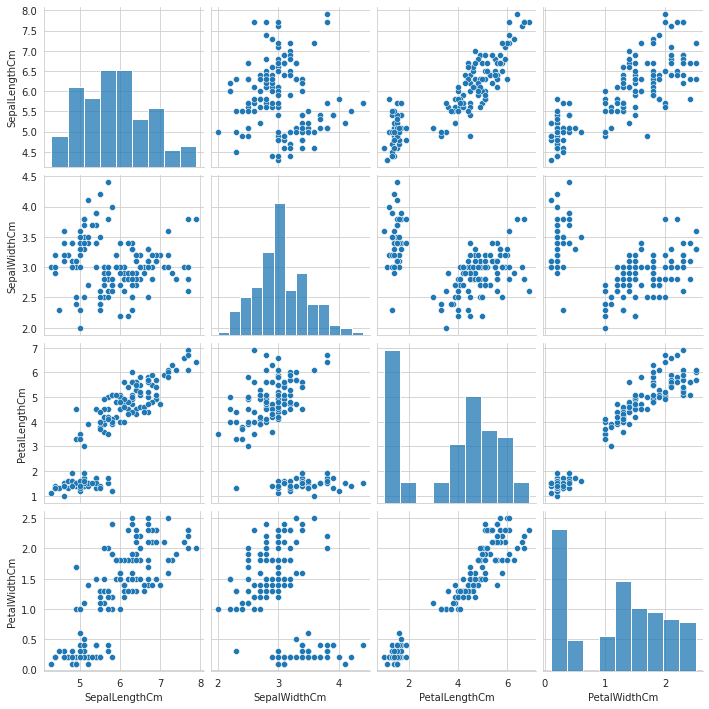

In [ ]:
sns.pairplot(iris)

### Looking carefully we can roughly see 2 blobs of points.

## Univariate Analysis

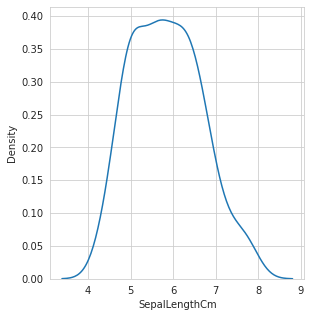

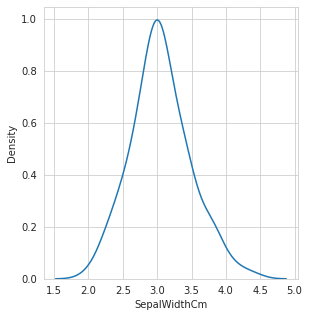

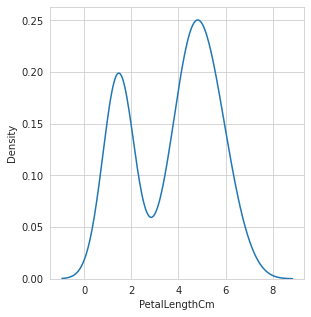

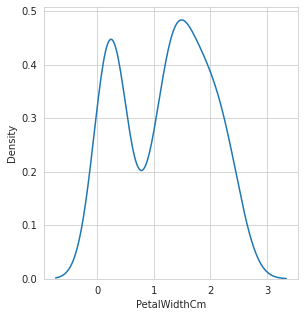

In [ ]:
for col in iris.columns[:-1] :
    plt.figure(figsize = (10, 5))
    plt.subplot(121)
    sns.kdeplot(iris[col])

### SepalLengthCM and SepalWidthCM are unimodal and fairly well distributed.
### PetalLengthCM and PetalWidthCM are bimodal and fairly well distributed.

### Hence, there would be very few outliers which won't affect our model even if left unchecked.

In [ ]:
for col in iris.columns[:-1] :
    print(col, ':-', iris[col].nunique()) # The .nunique() gives the number of unique values in a given column.

SepalLengthCm :- 35
SepalWidthCm :- 23
PetalLengthCm :- 43
PetalWidthCm :- 22


## Multivariate Analysis

In [ ]:
px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color = 'PetalWidthCm')

### In the above graph color equals PetalWidthCM, since it has the least number of unique values.
### Apart from the two blobs apparent we also see a third blob showing up at PetalLengthCM>= 5.0 roughly after which the values of PetalWidthCM suddenly jump from 1.7, 1.8 to over 2.1.   

## Finding the optimum number of clusters using the Elbow Method.

In [ ]:
data = iris.iloc[:, : -1]

wcss = [] # within cluster sum of squares is the square of distance between each point and the centroid of the cluster.
for i in range(1, 11) : # We try clusters from 1-10.
    kms = KMeans(n_clusters = i, random_state = 44)
    kms.fit(data)
    wcss.append(kms.inertia_) # kms.inertia_ gives the centroid coordinates.

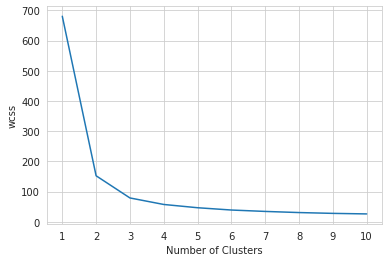

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

### According to the graph the optimum number of clusters is three.

## Building the model.

In [ ]:
model = KMeans(n_clusters=3, random_state=44)
model.fit(data)

pred = model.predict(data)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Adding the new labels created to the dataframe.

In [ ]:
iris['label'] = pred

## Visualizing the clusters on a 3D scatter plot.

In [ ]:
px.scatter_3d(iris, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='label')

## Visualizing the clusters on the first two columns.

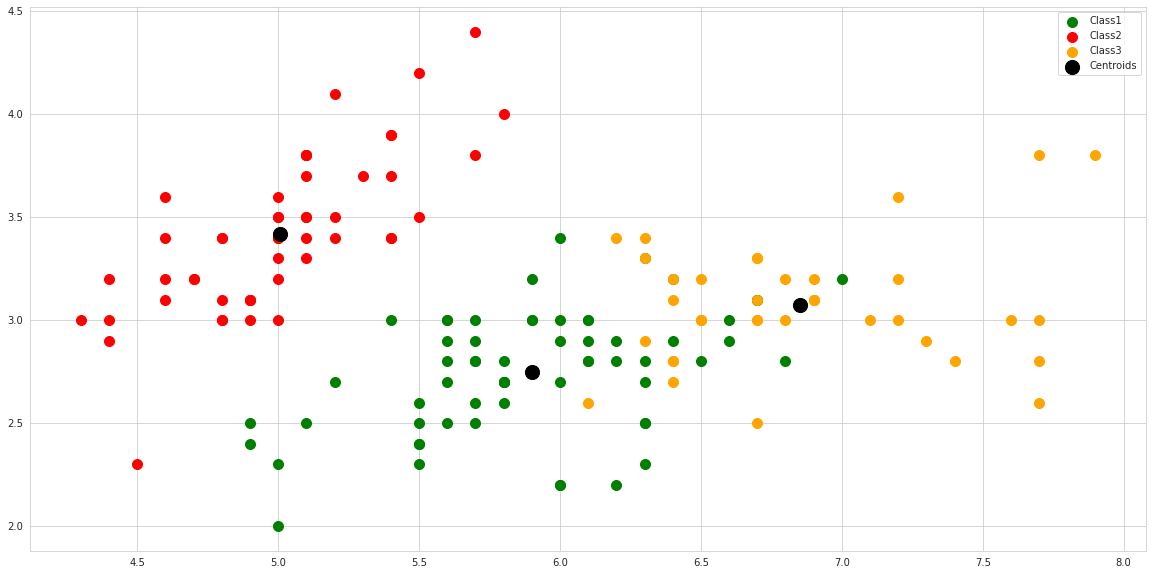

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(iris[pred == 0]['SepalLengthCm'], iris[pred == 0]['SepalWidthCm'], c='green', s=100, label='Class1')
plt.scatter(iris[pred == 1]['SepalLengthCm'], iris[pred == 1]['SepalWidthCm'], c='red', s=100, label='Class2')
plt.scatter(iris[pred == 2]['SepalLengthCm'], iris[pred == 2]['SepalWidthCm'], c='orange', s=100, label='Class3')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200, label='Centroids')

plt.legend()

# The optimum number clusters for the data is three.